In [4]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('../data/spam.csv', encoding='latin-1')

In [9]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2687,ham,Okie,NaN,NaN,NaN
2940,ham,My supervisor find 4 me one lor i thk his stud...,NaN,NaN,NaN
3788,ham,Are you sure you don't mean \get here,"we made you hold all the weed\""""",NaN,NaN
2243,ham,Boo I'm on my way to my moms. She's making tor...,NaN,NaN,NaN
3155,ham,Long time. You remember me today.,NaN,NaN,NaN


In [11]:
data.shape

(5572, 5)

In [ ]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Build a Website
#8. Deploy the Website

## 1. Data Cleaning

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop the unnecessary columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
data.sample(5)

,v1,v2
5218,ham,I accidentally brought em home in the box
5119,ham,Lol for real. She told my dad I have cancer
1008,ham,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
5126,ham,"To the wonderful Okors, have a great month. We..."
3072,ham,Somebody should go to andros and steal ice


In [11]:
data.rename(columns={'v1':'isSpam','v2':'message'},inplace=True)
data.sample(5)

,isSpam,message
1945,ham,Can Ì_ call me at 10:10 to make sure dat i've ...
1389,ham,"Haha... Where got so fast lose weight, thk muz..."
5186,ham,I uploaded mine to Facebook
4321,ham,Sorry . I will be able to get to you. See you ...
3778,spam,"Claim a 200 shopping spree, just call 08717895..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
data['isSpam'] = encoder.fit_transform(data['isSpam'])

In [14]:
data.head()

,isSpam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check for missing values
data.isnull().sum()

isSpam     0
message    0
dtype: int64

In [32]:
#check for duplicate values
data.duplicated().sum()

np.int64(403)

In [16]:
#remove duplicates
data = data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

np.int64(0)

## 2. EDA

In [18]:
data['isSpam'].value_counts()

isSpam
0    4516
1     653
Name: count, dtype: int64

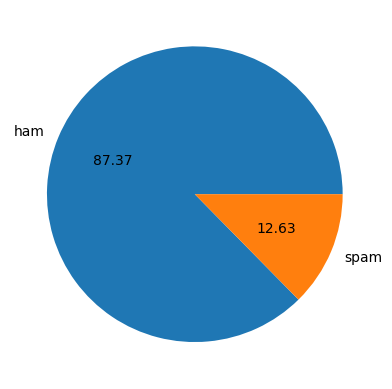

In [41]:
import matplotlib.pyplot as plt
plt.pie(data['isSpam'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
data['numberOfChars'] = data['message'].apply(len)

In [47]:
data.head()

,isSpam,message,NumberOfChars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# nltk.data.path.append(r"C:\Users\Karan\AppData\Roaming\nltk_data")
data['numberOfWords'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [68]:
data.head()

,isSpam,message,numberOfChars,numberOfWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
data['numberOfSentences'] = data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,isSpam,message,numberOfChars,numberOfWords,numberOfSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
data[['numberOfChars','numberOfWords','numberOfSentences']].describe()

,numberOfChars,numberOfWords,numberOfSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
#ham messages
data[data['isSpam'] == 0][['numberOfChars','numberOfWords','numberOfSentences']].describe()

,numberOfChars,numberOfWords,numberOfSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
#ham messages
data[data['isSpam'] == 1][['numberOfChars','numberOfWords','numberOfSentences']].describe()

,numberOfChars,numberOfWords,numberOfSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
import seaborn as sns

<Axes: xlabel='numberOfChars', ylabel='Count'>

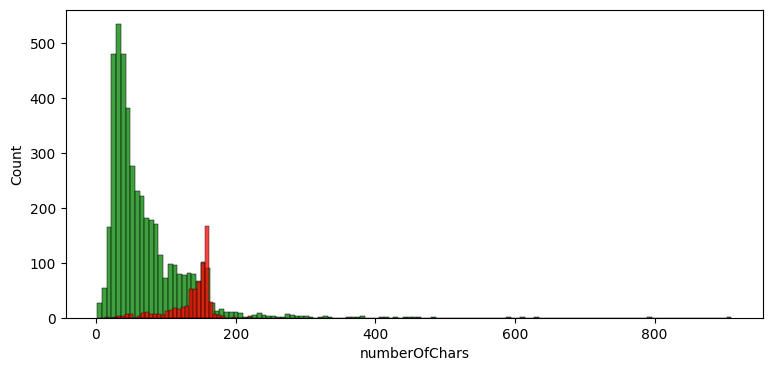

In [80]:
plt.figure(figsize=(9,4))
sns.histplot(data[data['isSpam'] == 0]['numberOfChars'],color='green')
sns.histplot(data[data['isSpam'] == 1]['numberOfChars'],color='red')

<Axes: xlabel='numberOfWords', ylabel='Count'>

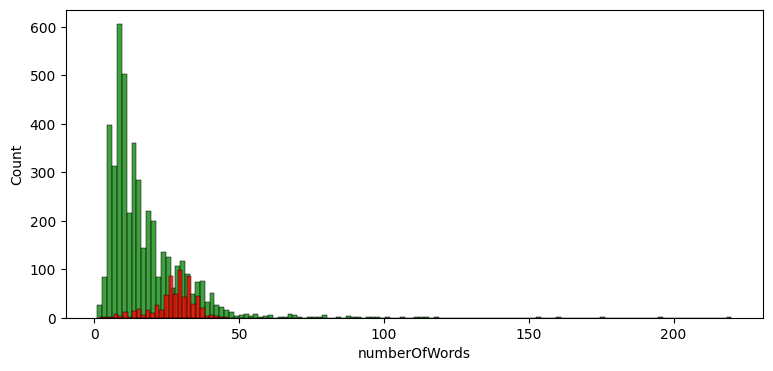

In [82]:
plt.figure(figsize=(9,4))
sns.histplot(data[data['isSpam'] == 0]['numberOfWords'],color='green')
sns.histplot(data[data['isSpam'] == 1]['numberOfWords'],color='red')

<Axes: xlabel='numberOfSentences', ylabel='Count'>

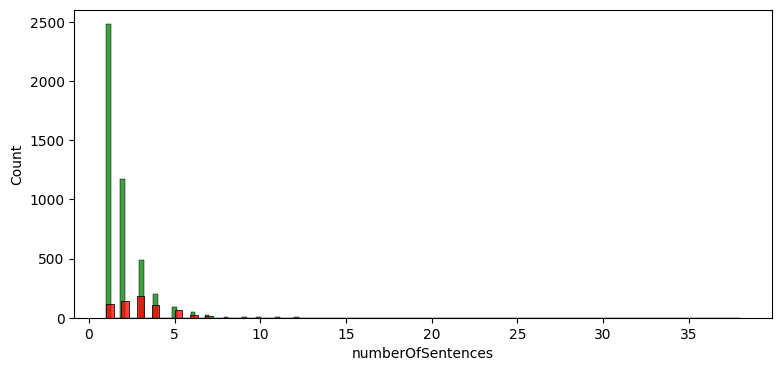

In [83]:
plt.figure(figsize=(9,4))
sns.histplot(data[data['isSpam'] == 0]['numberOfSentences'],color='green')
sns.histplot(data[data['isSpam'] == 1]['numberOfSentences'],color='red')

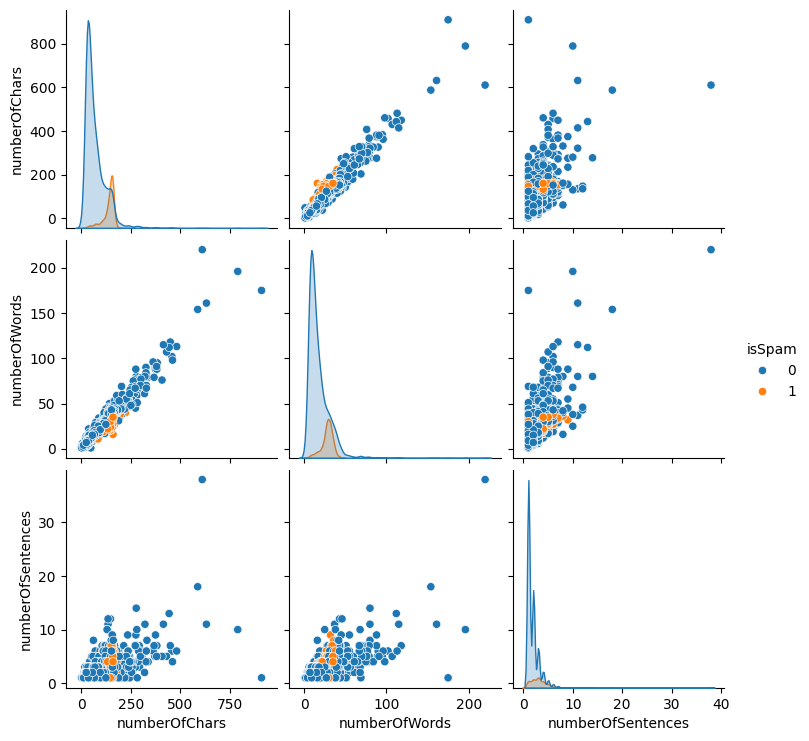

In [84]:
sns.pairplot(data,hue='isSpam')

<Axes: >

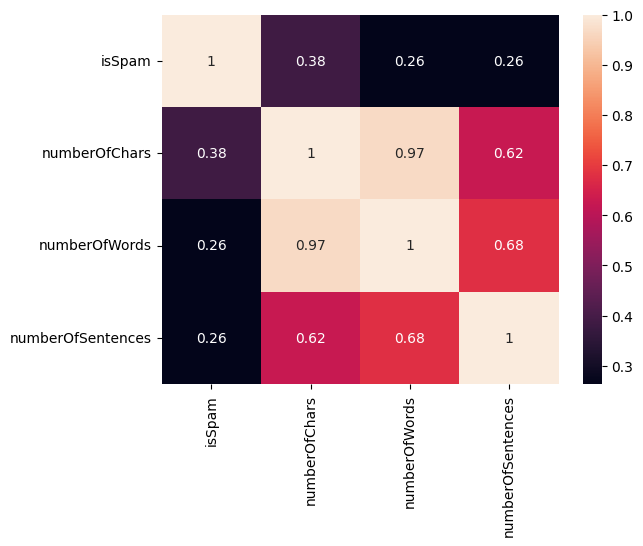

In [90]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)


## 3.Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters (punctuations included)
- Removing stop words 
- Stemming

In [24]:
def transform_message(mess):
    mess = mess.lower()
    mess = nltk.word_tokenize(mess)
    
    newMess = []
    for i in mess:
        if i.isalnum():
            newMess.append(i)
            
    mess = newMess[:]
    newMess.clear()
    for i in mess:
        if i not in stopwords.words('english'):
            newMess.append(i)
            
    mess = newMess[:]
    newMess.clear()
    for i in mess:
        newMess.append(ps.stem(i))
            
    return ' '.join(newMess)

In [27]:
transform_message(data['message'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [26]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [28]:
data['transformedMessage'] = data['message'].apply(transform_message)

In [29]:
data.head()

,isSpam,message,numberOfChars,numberOfWords,numberOfSentences,transformedMessage
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [ ]:
spamWc = wc.generate(data[data['isSpam'] == 1]['transformedMessage'].str.cat(sep=' '))

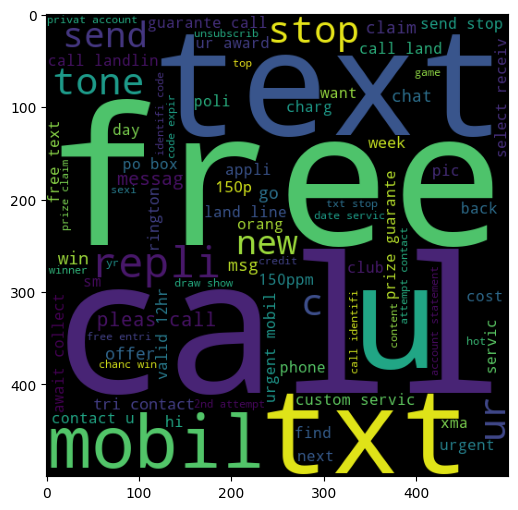

In [142]:
plt.figure(figsize=(6,6))
plt.imshow(spamWc)

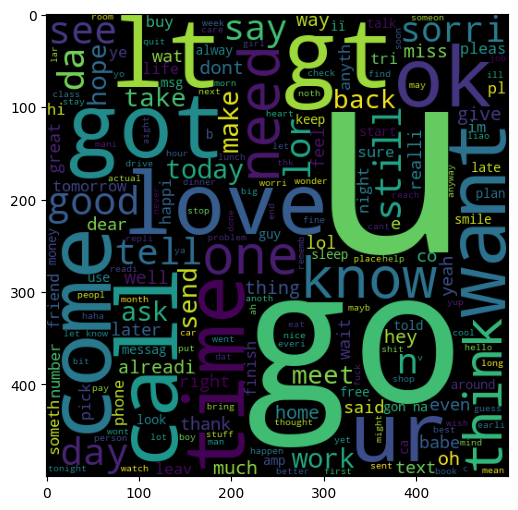

In [145]:
hamWc = wc.generate(data[data['isSpam'] == 0]['transformedMessage'].str.cat(sep=' '))
plt.figure(figsize=(6,6))
plt.imshow(hamWc)

In [165]:
spamCorpus = []
for mess in data[data['isSpam'] == 1]['transformedMessage'].tolist():
    for words in mess.split():
        spamCorpus.append(words)

In [149]:
len(spamCorpus)

9939

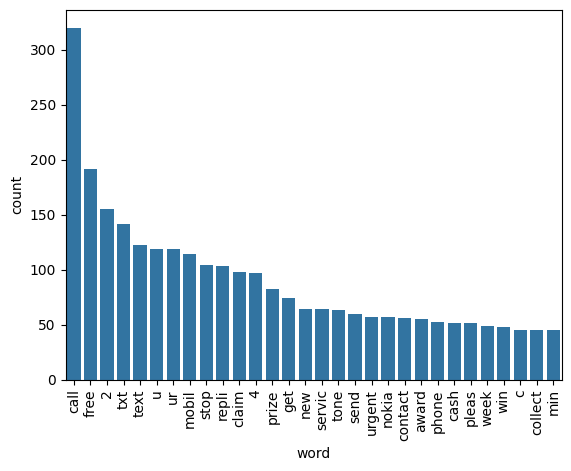

In [166]:
from collections import Counter
wordCountData = pd.DataFrame(Counter(spamCorpus).most_common(30), columns=['word','count'])
sns.barplot(x = 'word',y = 'count', data = wordCountData)
plt.xticks(rotation = 'vertical')
plt.show()

In [167]:
hamCorpus = []
for mess in data[data['isSpam'] == 0]['transformedMessage'].tolist():
    for words in mess.split():
        hamCorpus.append(words)

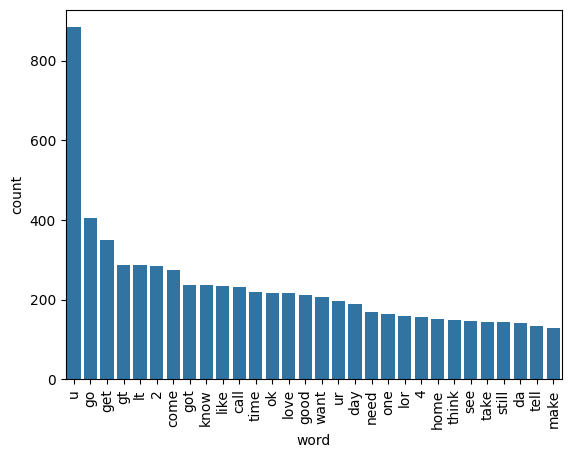

In [168]:
wordCountData = pd.DataFrame(Counter(hamCorpus).most_common(30), columns=['word','count'])
sns.barplot(x = 'word',y = 'count', data = wordCountData)
plt.xticks(rotation = 'vertical')
plt.show()

## 4.Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [53]:
X = tfidf.fit_transform(data['transformedMessage']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 2000))

In [54]:
y = data['isSpam'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train,y_train) 
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8491295938104448
[[765 131]
 [ 25 113]]
0.46311475409836067


In [59]:
mnb.fit(X_train,y_train) 
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [60]:
bnb.fit(X_train,y_train) 
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


## Current Best = tfidf(2000) -> MNB

In [61]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('MNB', mnb),('BNB', bnb)], voting = 'soft')

In [62]:
voting.fit(X_train,y_train)
y_pred4 = voting.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9845261121856866
[[896   0]
 [ 16 122]]
1.0


In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))